# Home Credit Kaggle Competition EDA

Importing Library for data analysis

In [19]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

Reading the "application_train.csv" and application_test.csv into the dataframe

In [54]:
inDf = pd.read_csv("C:\\MyStuff\\ASU\\Research\\Kaggle\\Home_Credit\\application_train.csv")
testDf = pd.read_csv("C:\\MyStuff\\ASU\\Research\\Kaggle\\Home_Credit\\application_test.csv")

In [55]:
inDf.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
#Getting the count of the approved and not approved loan counts in the training data
inDf['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [57]:
inDf['TARGET'].astype(int).plot.hist()

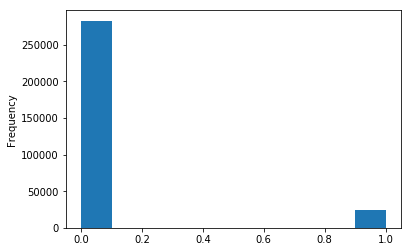

In [58]:
plt.show()
plt.legend()

The above plot shows a class imbalance problem 

In [59]:
# Analyzing the training data
inDf.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [60]:
# Null values in the DF
cntNullVal = inDf.isnull().sum();
# Of missing values in each columns
nullvalpercent = 100 * inDf.isnull().sum()/len(inDf)
# Create a DF out of above values and sort in ascending order
nullValtab = pd.concat([cntNullVal,nullvalpercent],axis=1)
# Renaming the default column of the table
nullValtab = nullValtab.rename(columns= {0:'Null Value Count',1:'% Null Value'})
# Sorting the table in ascending order to get a more better visualization of which feature is sparse 
nullValTabAsc = nullValtab[nullValtab.iloc[:,1] != 0].sort_values('% Null Value', ascending=False).round(2)

In [61]:
nullValTabAsc

,Null Value Count,% Null Value
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35


In [62]:
# Getting the count of all the unique dtypes in the DF
inDf.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [63]:
inDf.select_dtypes(include=['object']).apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Organization type has the highest no of categories , we will convert it into categorical values by label encoder and one hot encoding

In [68]:
# sklearn label encoder for categories with 2 types and one hot encoding for categories with more than 2 values
from sklearn.preprocessing import LabelEncoder
labelEnc = sklearn.preprocessing.LabelEncoder()
labelEncCount = 0
for col in inDf:
    if inDf[col].dtype == 'object':
        #Label encoding for only column with 2 values
        if len(list(inDf[col].unique())) == 2:
            labelEnc.fit(inDf[col])
            inDf[col] = labelEnc.transform(inDf[col])
            testDf[col] = labelEnc.transform(testDf[col])
            labelEncCount += 1

print('Total number of label encoded columns',labelEncCount)


Total number of label encoded columns 3


In [69]:
# Rest categorical values are changed to one hot encoding 
inDf = pd.get_dummies(inDf)
testDf = pd.get_dummies(testDf)

In [70]:
inDf.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,0,0,1,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,...,0,0,0,0,0,0,0,0,0,0
7,100010,0,0,1,1,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,0,0,1,0,112500.0,1019610.0,33826.5,913500.0,...,0,0,0,0,0,0,0,0,0,0
9,100012,0,1,0,1,0,135000.0,405000.0,20250.0,405000.0,...,0,0,0,0,0,0,0,0,0,0
